# Optimisation numérique avec `scipy`

*Prérequis : connaître numpy et les concepts généraux de l'optimisation numérique.*

Pour l'optimisation, on peut utiliser les fonctions du module `SciPy`.

In [53]:
import numpy as np
from scipy.optimize import linprog

## 1. Premier exemple en programmation linéaire

On va résoudre le problème de programmation linéaire:
```
Minimiser :          c^T * x
Sous contraintes :   A_ub * x <= b_ub
                     A_eq * x == b_eq
```

N'oubliez pas qu'on peut toujours demander de l'aide !

In [54]:
help(linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, gives the values of
        the upper-bound inequality constraints at ``x``.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in ``A_ub``.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, 

Commençons par un problème basique.

In [55]:
c = [-1, 4] # -x0 + 4*x1
A = [[-3, 1], [1, 2]] # -3*x0 + x1 <= 6 & x0 + 2*x1 <= 4
b = [6, 4]

In [56]:
x0_bounds = (0, 100) # x0 libre
x1_bounds = (-3, None) # x1 >= -3

In [57]:
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),
              options={"disp": True})

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 1


In [58]:
print(res)

     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([39.,  0., 90.])
  status: 0
 success: True
       x: array([10., -3.])


## Correction de l'exercice sur les centrales

In [59]:
linprog(
    c=[5, 10],
    A_eq=[[1, 1]],
    b_eq=[50],
    bounds=[[0, 30], [0, 40]]
)

     fun: 350.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 20.])
  status: 0
 success: True
       x: array([30., 20.])

## 2. Un exemple un peu plus complexe

On a à notre disposition 5 centrales électriques pour produire une puissance de 350 MW pendant une heure.

* Les coûts des centrales sont de 20 €/MWh, 40 €/MWh, 24 €/MWh, 12 €/MWh et 32 €/MWh.
* Les puissances maximales de chaque centrale sont de 100 MW.

In [48]:
c = [20, 40, 24, 12, 32]
A = [[1, 1, 1, 1, 1]]
b = [350]

In [49]:
bounds = (0, 100)

In [50]:
res = linprog(c, A_eq=A, b_eq=b,
              bounds=(bounds, bounds, bounds, bounds, bounds),
              options={"disp": True})

Optimization terminated successfully.
         Current function value: 7200.000000 
         Iterations: 6


In [51]:
print(res)

     fun: 7200.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([   0.,  100.,    0.,    0.,   50.])
  status: 0
 success: True
       x: array([ 100.,    0.,  100.,  100.,   50.])


La solution semble effectivement la plus raisonnable (**toujours vérifier la solution !!**) : on commence par prouire avec la centrale la moins chère, puis on augmente.

## 3. Augmentons un peu la taille du problème

On va monitorer le temps passé.

Pour cela, on utilise la fonction `time.time()` qui nous rend l'heure en secondes.

In [2]:
import time

In [53]:
def my_opt(n=5):
    c = np.random.uniform(low=20, high=40, size=n)
    A = np.ones(shape=(1, n))
    b = np.random.uniform(low=0.7, high=1.0, size=1) * n * 100
    
    bounds = (0, 100)
    
    res = linprog(c, A_eq=A, b_eq=b, bounds=bounds)
    
    return b, c, res

In [54]:
b, c, res = my_opt()
print('Demande:', b)
print("Coûts:", c)
print("Résultat:", res)

Demande: [ 468.08164711]
Coûts: [ 36.21837335  28.92366436  37.94227749  39.02267356  26.64288758]
Résultat:      fun: 15629.448167871071
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([  0.        ,   0.        ,   0.        ,  31.91835289,   0.        ])
  status: 0
 success: True
       x: array([ 100.        ,  100.        ,  100.        ,   68.08164711,  100.        ])


In [55]:
t = time.time()
for i in range(100):
    my_opt()

print(round(time.time()-t, 2), "secondes")

0.36 secondes


Profitons-en pour faire quelques affichages avec `matplotlib`.

In [3]:
import matplotlib.pyplot as plt

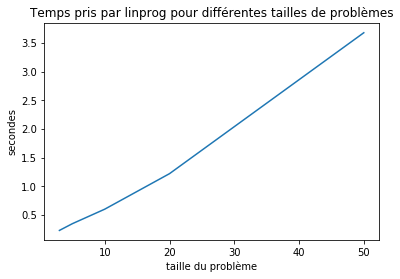

In [57]:
nb_tests = 100
tailles = [3, 5, 10, 20, 50]
temps = []

for taille in tailles:
    t = time.time()
    for i in range(nb_tests):
        my_opt(taille)
    temps.append(time.time() - t)

plt.plot(tailles, temps)

plt.title("Temps pris par linprog pour différentes tailles de problèmes")
plt.xlabel("taille du problème")
plt.ylabel("secondes")

plt.show()